# MicroGrad demo

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from engine import Value
from nn import Neuron, Layer, MLP

In [8]:
np.random.seed(1337)
random.seed(1337)

## Synthetic Data

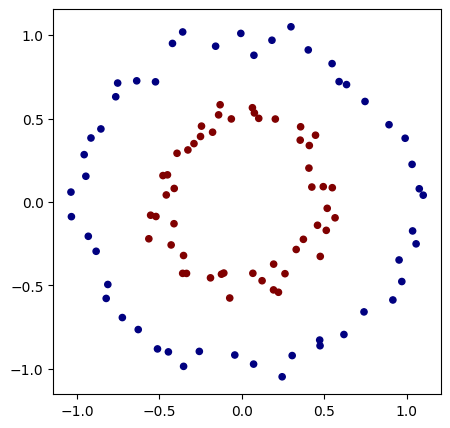

In [9]:
from sklearn.datasets import make_circles, make_moons
X, y = make_circles(n_samples=100 , factor=.5, noise=0.05)

y = y*2-1
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

## Initialize a Model

In [10]:
# MLP

model = MLP(2, [16, 16, 1]) # 2-layer neural network
print(model) 
print("number of parameters", len(model.parameters()))

MLP of [Layer of [Leaky_RelUNeuron(2), Leaky_RelUNeuron(2), Leaky_RelUNeuron(2), Leaky_RelUNeuron(2), Leaky_RelUNeuron(2), Leaky_RelUNeuron(2), Leaky_RelUNeuron(2), Leaky_RelUNeuron(2), Leaky_RelUNeuron(2), Leaky_RelUNeuron(2), Leaky_RelUNeuron(2), Leaky_RelUNeuron(2), Leaky_RelUNeuron(2), Leaky_RelUNeuron(2), Leaky_RelUNeuron(2), Leaky_RelUNeuron(2)], Layer of [Leaky_RelUNeuron(16), Leaky_RelUNeuron(16), Leaky_RelUNeuron(16), Leaky_RelUNeuron(16), Leaky_RelUNeuron(16), Leaky_RelUNeuron(16), Leaky_RelUNeuron(16), Leaky_RelUNeuron(16), Leaky_RelUNeuron(16), Leaky_RelUNeuron(16), Leaky_RelUNeuron(16), Leaky_RelUNeuron(16), Leaky_RelUNeuron(16), Leaky_RelUNeuron(16), Leaky_RelUNeuron(16), Leaky_RelUNeuron(16)], Layer of [LinearNeuron(16)]]
number of parameters 337


## Loss Function

In [11]:
def loss(batch_size=None):
    
    # inline DataLoader
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).leaky_relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=0.9243236671208802) 0.5


## Optimization

In [12]:
for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 0.9243236671208802, accuracy 50.0%
step 1 loss 0.7939549879874787, accuracy 67.0%
step 2 loss 0.6752297296044827, accuracy 77.0%
step 3 loss 0.5922043254195009, accuracy 77.0%
step 4 loss 0.5878630637208866, accuracy 71.0%
step 5 loss 0.4953667106405745, accuracy 83.0%
step 6 loss 0.9079956130665161, accuracy 63.0%
step 7 loss 1.0931480767773212, accuracy 62.0%
step 8 loss 0.5009352418014528, accuracy 74.0%
step 9 loss 0.7541015641005212, accuracy 63.0%
step 10 loss 0.8923038323758838, accuracy 53.0%
step 11 loss 0.4343144545331403, accuracy 88.0%
step 12 loss 0.19935988729403153, accuracy 93.0%
step 13 loss 0.6049492624873491, accuracy 64.0%
step 14 loss 0.7510073267402436, accuracy 60.0%
step 15 loss 0.4148488396936951, accuracy 83.0%
step 16 loss 0.3997840694646865, accuracy 82.0%
step 17 loss 0.7484132457347478, accuracy 61.0%
step 18 loss 0.4613249287288377, accuracy 82.0%
step 19 loss 0.560595695197512, accuracy 73.0%
step 20 loss 0.35173748863992405, accuracy 84.0%
s

(-2.048664048122821, 1.9513359518771791)

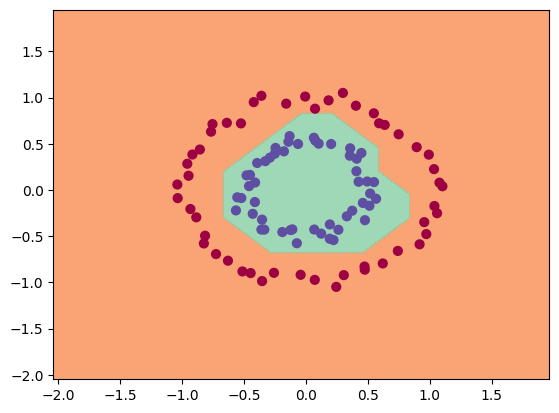

In [13]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())